In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\sadhana reddy'

In [3]:
os.chdir('C:\\Users\\sadhana reddy\\desktop\\Projects\\Iris')
os.getcwd()

'C:\\Users\\sadhana reddy\\desktop\\Projects\\Iris'

In [4]:
Iris_data = pd.read_csv('Iris data.csv')

In [5]:
Iris_data.head()

,Sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal length in cm    150 non-null float64
sepal width in cm     150 non-null float64
petal length in cm    150 non-null float64
petal width in cm     150 non-null float64
class                 150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
#rename columns
Iris_data.columns = ['Sepallen','SepalWid','Petallen','Petalwid','FlowerType']

In [8]:
Iris_data.columns

Index(['Sepallen', 'SepalWid', 'Petallen', 'Petalwid', 'FlowerType'], dtype='object')

In [9]:
#converting flowertype to categorical variable
Iris_data.FlowerType = Iris_data.FlowerType.astype('category')

In [10]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepallen      150 non-null float64
SepalWid      150 non-null float64
Petallen      150 non-null float64
Petalwid      150 non-null float64
FlowerType    150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


In [11]:
Iris_data.FlowerType.unique()

[Iris-setosa, Iris-versicolor, Iris-virginica]
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# visualizing to see if there are any outliers

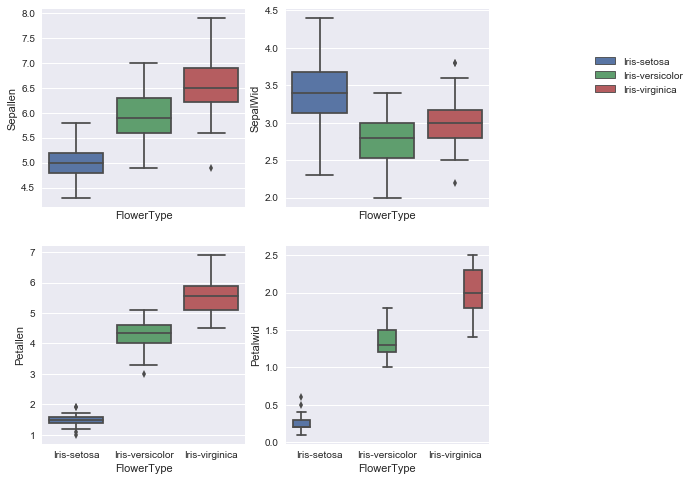

In [18]:
f,ax = plt.subplots(2,2,figsize = (8,8),sharex =True, sharey = False)
#plt.title('Distributions of individual attributes across Flower Classes')

# Visualizing sepal length in box plot
boxsl = sns.boxplot(y ='Sepallen', x = 'FlowerType', data=Iris_data, ax = ax[0][0] )
plt.xlabel('FlowerType')
# Visualizing sepal Width in box plot
boxsw = sns.boxplot(y ='SepalWid', x = 'FlowerType', data=Iris_data, ax = ax[0][1] )
# Visualizing sepal Width in box plot
boxpl = sns.boxplot(y ='Petallen', x = 'FlowerType', data=Iris_data, ax = ax[1][0] )
# Visualizing sepal Width in box plot
boxpw = sns.boxplot(y ='Petalwid', x = 'FlowerType', hue = 'FlowerType',data=Iris_data, ax = ax[1][1] )
plt.legend(bbox_to_anchor = (2,2))
plt.show()

Using combination of Sepal Length and Sepal Width to understand and accurately predict the class types of flowers

In [71]:
#creating data frames
X = Iris_data.iloc[:,0:2].values

In [72]:
X.shape

(150, 2)

In [73]:
Y = Iris_data.iloc[:,-1].values

In [74]:
Y.shape

(150,)

In [75]:
#converting y to categorical numerical variable *LabelEncoder
from sklearn.preprocessing import LabelEncoder
Y_dv = LabelEncoder()
Y = Y_dv.fit_transform(Y)

In [76]:
set(Y)#unique values in Y

{0, 1, 2}

In [77]:
# split into test and train set
import warnings
warnings.filterwarnings('ignore')

from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33, random_state = 0)

In [124]:
# implementing Logistic regression
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression(random_state = 0, C = 1)
LRC.fit(x_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
x_train.shape

(100, 2)

In [107]:
#visualizing logistic regression with Regularization parameter C = 100
from matplotlib.colors import ListedColormap
X_set, Y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))


In [108]:
X1.shape

(420, 560)

In [82]:
X2.shape

(420, 560)

In [83]:
X1.ravel().size

235200

In [84]:
X2.ravel()

array([ 1.2 ,  1.2 ,  1.2 , ...,  5.39,  5.39,  5.39])

In [85]:
420*560

235200

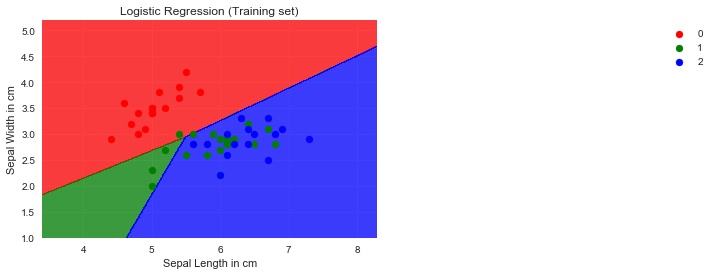

In [126]:
plt.contourf(X1, X2, LRC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green','Blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend(bbox_to_anchor = (2,1))
plt.show()

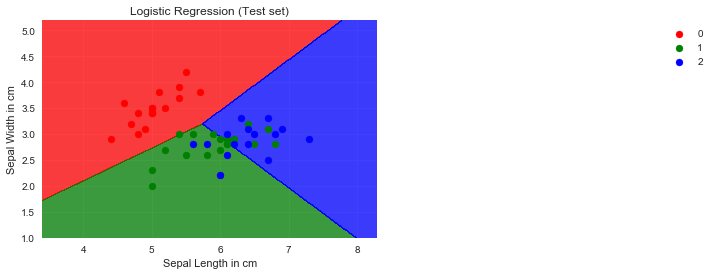

In [120]:
# testing the above classifier with C = 100 on test set
from matplotlib.colors import ListedColormap
X_set, Y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LRC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green','Blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend(bbox_to_anchor = (2,1))
plt.show()

For Regularization parameter C = 1, below are the confusion matrix details

In [136]:
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression(random_state = 0, C = 1)
LRC.fit(x_train, y_train)

y_pred = LRC.predict(x_test)

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,y_pred)

In [137]:
CM #C = 1

array([[16,  0,  0],
       [ 1,  3, 15],
       [ 0,  0, 15]], dtype=int64)

In [138]:
#accuracy score 
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred)
Accuracy

0.68000000000000005

Similarly for C = 100, The accuracy rate has been improved

In [132]:
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression(random_state = 0, C = 100)
LRC.fit(x_train, y_train)

y_pred = LRC.predict(x_test)

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test,y_pred)
CM

array([[16,  0,  0],
       [ 1, 12,  6],
       [ 0,  4, 11]], dtype=int64)

In [135]:
#accuracy score 
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred)
Accuracy

0.78000000000000003

# Similarly as above, now using the petal features, (length and width) to classify the Flowers

In [141]:
#creating data frames
X = Iris_data.iloc[:,2:-1].values

In [144]:
X.shape

(150, 2)

In [154]:
Y = Iris_data.iloc[:,-1].values

In [155]:
set(Y)

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [156]:
# Label Y
from sklearn.preprocessing import LabelEncoder
LE_y = LabelEncoder()
Y = LE_y.fit_transform(Y)

In [158]:
set(Y)

{0, 1, 2}

In [160]:
#splitting into train and test set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.33,random_state = 0)

 Training Logistic classifier using Training set for regularization parameter # C=1

In [162]:
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression(random_state = 0, C =1)
LRC.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

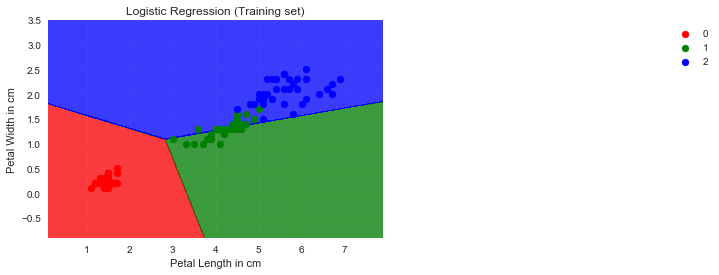

In [165]:
# visualizing the training set
from matplotlib.colors import ListedColormap
X_set, Y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LRC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green','Blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.legend(bbox_to_anchor = (2,1))
plt.show()

# predicting values on training set using above classifier

In [167]:
y_pred = LRC.predict(x_test)

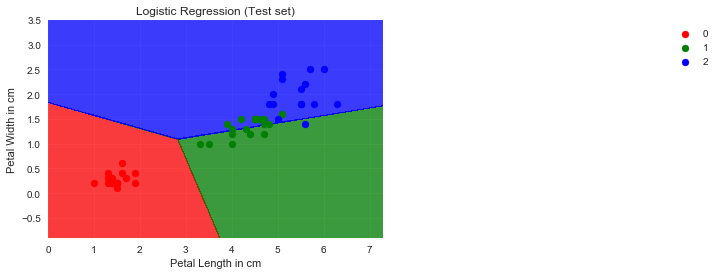

In [168]:
#validating results on test set
from matplotlib.colors import ListedColormap
X_set, Y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LRC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green','Blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.legend(bbox_to_anchor = (2,1))
plt.show()

plotting confusion matrix

In [170]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
CM

array([[16,  0,  0],
       [ 0,  7, 12],
       [ 0,  1, 14]], dtype=int64)

In [172]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred)
Accuracy

0.73999999999999999

# similarly implementing the same for regularization parameter C= 100

In [173]:
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression(random_state = 0, C =100)
LRC.fit(x_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:
y_pred = LRC.predict(x_test)

In [177]:
# visualizing Clasisfier results on test set results

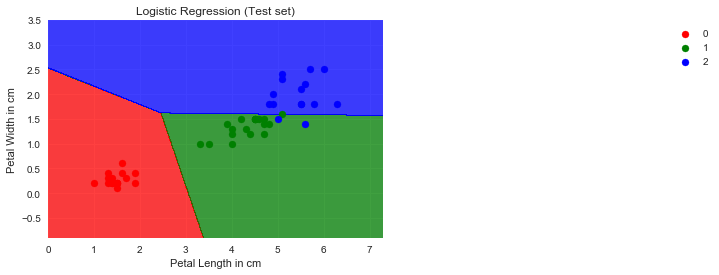

In [178]:
#validating results on test set
from matplotlib.colors import ListedColormap
X_set, Y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))
plt.contourf(X1, X2, LRC.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c = ListedColormap(('red', 'green','Blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Petal Length in cm')
plt.ylabel('Petal Width in cm')
plt.legend(bbox_to_anchor = (2,1))
plt.show()

In [179]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
CM

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  2, 13]], dtype=int64)

In [180]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred)
Accuracy

0.93999999999999995

# Now, obtaining the classifier results and finding accuracy using all 4 features

In [181]:
# creating dependent variable and independent variable
x = Iris_data.iloc[:,:-1].values
y = Iris_data.iloc[:,-1].values
# converting categorical variable into dummy variable
from sklearn.preprocessing import LabelEncoder
o_y = LabelEncoder()
y = o_y.fit_transform(y)
# splitting into train and test set
import warnings
warnings.filterwarnings('ignore')
from sklearn.cross_validation import train_test_split
train_x,test_x,train_y,test_y = train_test_split( x, y, test_size=0.33, random_state= 0)

In [187]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state= 0, C =100)
LR.fit(train_x, train_y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [188]:
# predict on test set
y_pred = LR.predict(test_x)

In [189]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(test_y,y_pred)
CM

array([[16,  0,  0],
       [ 0, 18,  1],
       [ 0,  0, 15]], dtype=int64)

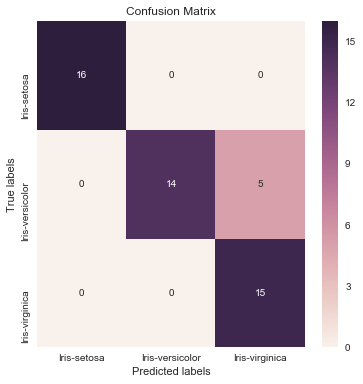

In [185]:
# plotting confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = 6,6
ax = plt.subplot()
ht = sns.heatmap(CM, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
ax.yaxis.set_ticklabels(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']);

In [190]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_pred)
Accuracy

0.97999999999999998

# In conclusion, the maximum accuracy of classifier was acheived when all four features where used and the accuracy rate is 97.99% with regularization parameter C = 100